In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [3]:
caminho = 'tabela_imigrantes.xlsx'
tabela_original = pd.read_excel(caminho)
tabela_original

,data_entrada_brasil,data_cadastro,dif_dtcad_dtingr_meses,sexo,fx_etaria,pais_origem,distrito_moradia,condicoes_moradia,cidade_ingresso,cor_raca,escolaridade,situacao_migratoria,fonte_renda,sabendo_crai,demanda_1
0,2012-09-09 00:00:00,2016-05-27 14:23:24.160,44,Masculino,Maiores de 60 anos,Afeganistão,Liberdade,Aluguel ou pensão,Não informado,Amarela,Ensino superior incompleto,Visto permanente,Não informado,Não informado,Documentos
1,2015-06-16 00:00:00,2017-05-31 12:42:03.000,23,Masculino,18 a 29 anos,Afeganistão,Brás,Aluguel ou pensão,Foz do Iguaçu,Branca,Ensino superior incompleto,Solicitante de refúgio,Trabalhador informal ou ambulante,Serviço público,Regularização migratória
2,2010-03-05 00:00:00,2018-03-19 17:33:35.000,96,Masculino,18 a 29 anos,Afeganistão,Pari,Aluguel ou pensão,Guarulhos,Branca,Ensino fundamental incompleto,Visto permanente,"Empresário (MEI, dono de loja, restaurante, etc.)",Instituições ou organizações,Regularização migratória
3,2012-07-25 00:00:00,2018-11-27 15:39:34.004,76,Masculino,18 a 29 anos,Afeganistão,Outro Município,Casa de parente ou amigo,Guarulhos,Branca,Ensino superior incompleto,Visto permanente,Trabalhador informal ou ambulante,Amigos ou parentes,Reinserção no mercado de trabalho
4,2008-10-10 00:00:00,2019-01-10 12:50:49.779,123,Masculino,40 a 49 anos,Afeganistão,Brás,Casa de parente ou amigo,Guarulhos,Branca,Não frequentou escola,Visto permanente,Trabalhador informal ou ambulante,Amigos ou parentes,Regularização migratória
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11829,2017-03-11 00:00:00,2017-04-26 15:03:09.000,1,Feminino,40 a 49 anos,Vietnã,Cambuci,Casa de parente ou amigo,Guarulhos,Amarela,Ensino fundamental completo,Indocumentado/ Irregular,Trabalhador informal ou ambulante,Amigos ou parentes,Regularização migratória
11830,2017-03-11 00:00:00,2017-04-26 15:08:10.000,1,Masculino,18 a 29 anos,Vietnã,Cambuci,Casa de parente ou amigo,Guarulhos,Amarela,Ensino médio completo,Indocumentado/ Irregular,Trabalhador informal ou ambulante,Amigos ou parentes,Regularização migratória
11831,2011-05-07 00:00:00,2016-01-27 00:00:00.000,56,Feminino,50 a 59 anos,Zâmbia,Liberdade,Aluguel ou pensão,Não informado,Preta,Ensino superior completo,Outros,Não informado,Não informado,Não informado
11832,2011-05-14 00:00:00,2016-10-28 14:35:00.352,65,Feminino,Maiores de 60 anos,Zâmbia,Liberdade,Aluguel ou pensão,Não informado,Preta,Ensino médio completo,Outros,Não informado,Não informado,Vaga em Centro de Acolhida


In [4]:
tabela_original['data_entrada_brasil'] = pd.to_datetime(tabela_original['data_entrada_brasil'], errors='coerce')

#remover linhas onde a data não pôde ser reconhecida porque tava dando erro na hr de selecionar so acima do ano 2000
tabela_nova = tabela_original.dropna(subset=['data_entrada_brasil'])

# Remover todas as linhas em que o ano da coluna 'data_entrada_brasil' seja menor do que 2000
tabela_nova = tabela_nova.loc[tabela_nova['data_entrada_brasil'].dt.year >= 2000]

len(tabela_nova)

11153

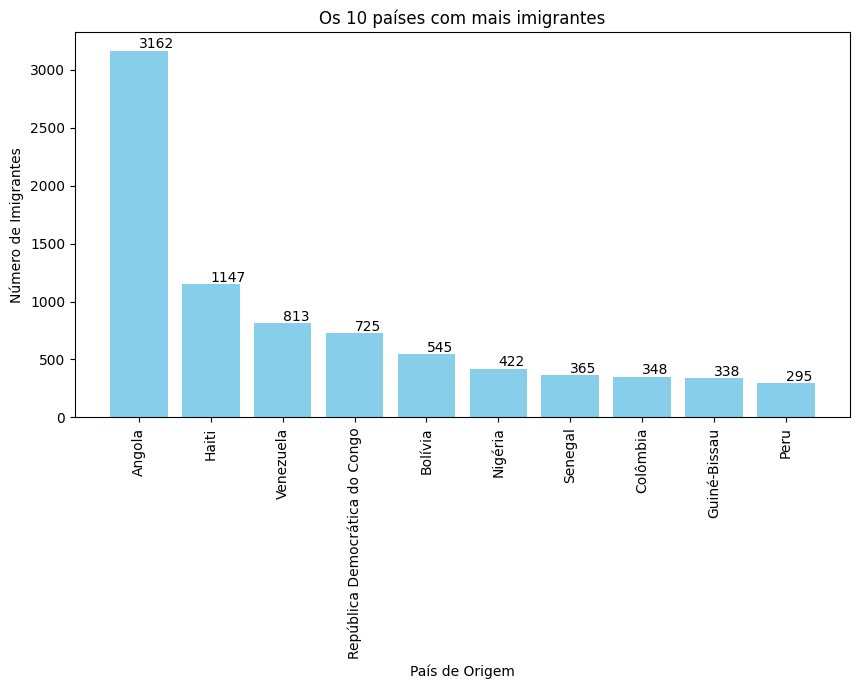

In [5]:
import matplotlib.pyplot as plt

# Contar o número de imigrantes de cada país
contagem_paises = tabela_nova['pais_origem'].value_counts()

# Selecionar os 10 países com mais imigrantes
dez_paises = contagem_paises[:10]

# Criar um gráfico de barras
plt.figure(figsize=(10,5))
bars = plt.bar(dez_paises.index, dez_paises.values, color='skyblue')

# Adicionar a quantidade de imigrantes no topo de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom') # va: vertical alignment

plt.title('Os 10 países com mais imigrantes')
plt.xlabel('País de Origem')
plt.ylabel('Número de Imigrantes')

plt.xticks(rotation=90)

plt.show()


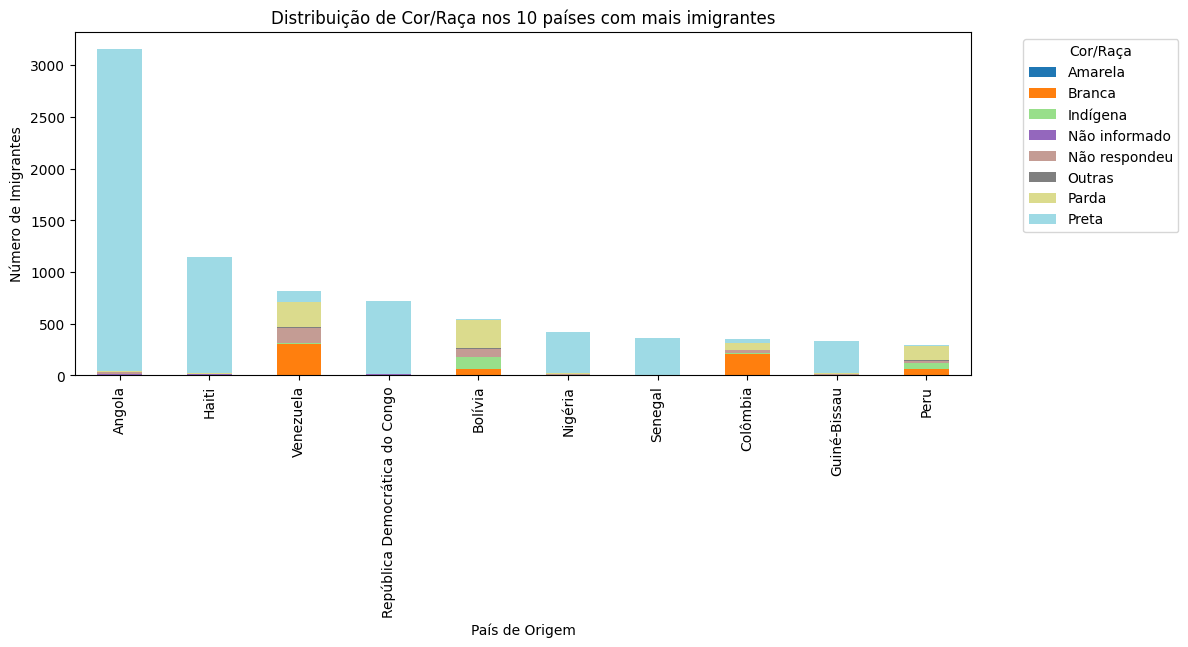

In [75]:
contagem_paises = tabela_nova['pais_origem'].value_counts()

dez_paises = contagem_paises[:10].index

dados_filtrados = tabela_nova[tabela_nova['pais_origem'].isin(dez_paises)]

distribuicao_cor_raca = dados_filtrados.groupby(['pais_origem', 'cor_raca']).size().unstack(fill_value=0)

distribuicao_cor_raca.loc[dez_paises].plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

plt.title('Distribuição de Cor/Raça nos 10 países com mais imigrantes')
plt.xlabel('País de Origem')
plt.ylabel('Número de Imigrantes')
plt.xticks(rotation=45)
plt.legend(title='Cor/Raça', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.xticks(rotation=90)

plt.show()

### Boxplot relacionando diferença de entrada no brasil x data primeiro atendimento X Situação migratoria

C:\Users\usuario007\AppData\Local\Temp\ipykernel_16140\3942511347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dif_dtcad_dtingr_meses'] = pd.to_numeric(df['dif_dtcad_dtingr_meses'], errors='coerce')
C:\Users\usuario007\AppData\Local\Temp\ipykernel_16140\3942511347.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='situacao_migratoria', y='dif_dtcad_dtingr_meses', data=df, palette=cores, showfliers=False)


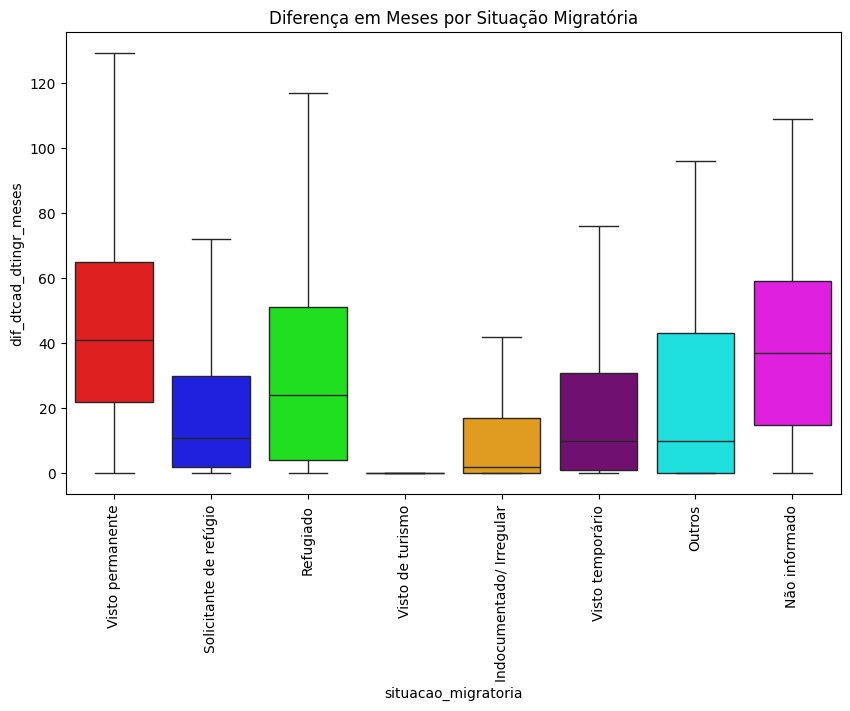

In [6]:
df = tabela_nova[['dif_dtcad_dtingr_meses', 'situacao_migratoria']]
df['dif_dtcad_dtingr_meses'] = pd.to_numeric(df['dif_dtcad_dtingr_meses'], errors='coerce')


cores = ['#FF0000', '#0000FF', '#00FF00','#FFFF00', '#FFA500', '#800080', '#00FFFF', '#FF00FF']


plt.figure(figsize=(10, 6))
sns.boxplot(x='situacao_migratoria', y='dif_dtcad_dtingr_meses', data=df, palette=cores, showfliers=False)
plt.title('Diferença em Meses por Situação Migratória')

plt.xticks(rotation=90)

plt.show()

Moda: 0.0, Media: 2.3266832917705735, Mediana: 0.0


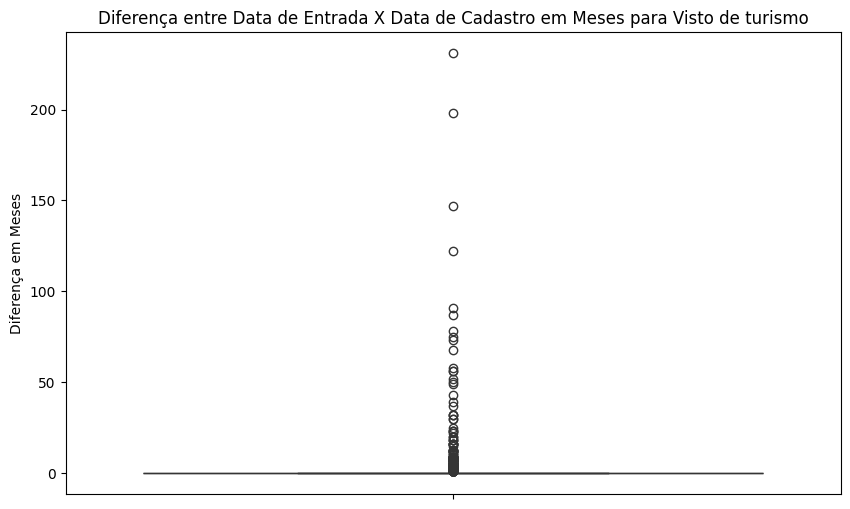

In [105]:
#Boxplot de uma situação migratoria especifica
stiaucao_migratoria = 'Visto de turismo'

df_filtrado = df[df['situacao_migratoria'] == stiaucao_migratoria]

media = df_filtrado['dif_dtcad_dtingr_meses'].mean()
moda = df_filtrado['dif_dtcad_dtingr_meses'].mode()
mediana = df_filtrado['dif_dtcad_dtingr_meses'].median()

print(f'Moda: {moda[0]}, Media: {media}, Mediana: {mediana}')

# Criar a figura para o boxplot
plt.figure(figsize=(10, 6))

# Gerar o boxplot usando seaborn
sns.boxplot(y='dif_dtcad_dtingr_meses', data=df_filtrado)

# Adicionar um título ao gráfico
plt.title(f'Diferença entre Data de Entrada X Data de Cadastro em Meses para {stiaucao_migratoria}')

# Rotular o eixo y
plt.ylabel('Diferença em Meses')

# Mostrar o gráfico
plt.show()

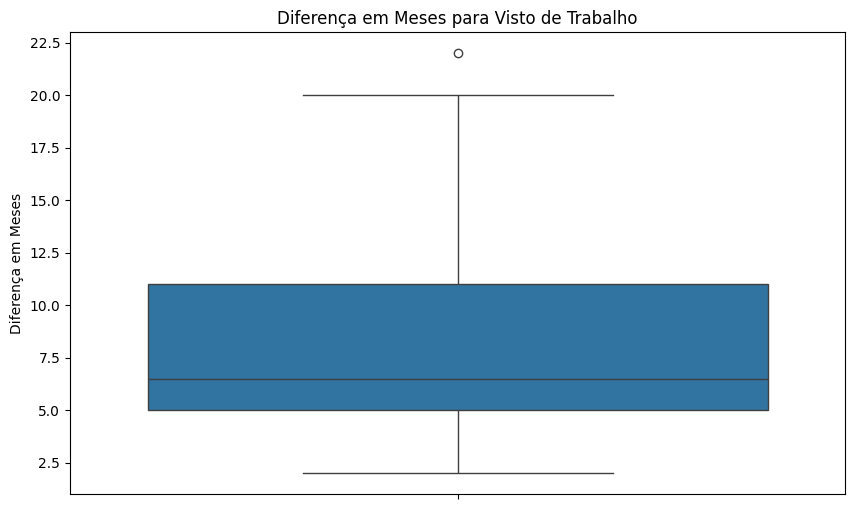

In [38]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'dif_dtcad_dtingr_meses': [2, 4, 5, 5, 6, 7, 8, 12, 20, 22],
    'situacao_migratoria': ['Visto de Trabalho'] * 10
}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))

sns.boxplot(y='dif_dtcad_dtingr_meses', data=df)

plt.title('Diferença em Meses para Visto de Trabalho')

plt.ylabel('Diferença em Meses')

plt.show()
